https://saturncloud.io/blog/converting-numpy-array-values-into-integers-a-comprehensive-guide/#:~:text=Numpy%20astype()%20Method%3A&text=The%20astype(int)%20function%20converts,rounding%20to%20the%20nearest%20integer.

https://stackoverflow.com/questions/25458442/rotate-a-2d-image-around-specified-origin-in-python

https://stackoverflow.com/questions/73757281/creating-a-grayscale-image-from-an-array-of-values

In [83]:

import imageio
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

/tmp/ipykernel_67796/3406574328.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  lena = imageio.imread('lena.png')


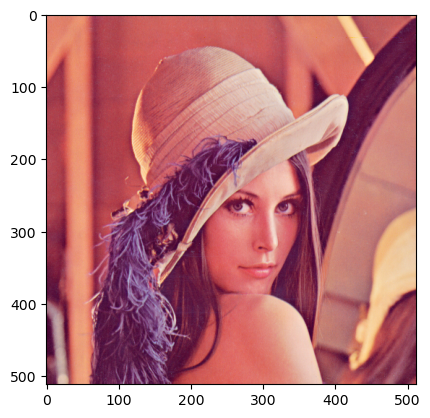

In [18]:
# Cargar la imagen "Lena"
lena = imageio.imread('lena.png')

# Mostrar la imagen
plt.imshow(lena)
plt.show()

In [19]:
type(lena)

numpy.ndarray

In [20]:
lena.shape, lena.dtype

((512, 512, 3), dtype('uint8'))

In [22]:
lena.tofile('lena.raw') # Creación de un fichero raw

In [31]:
lena_from_raw = np.fromfile('lena.raw', dtype=np.int64)
#lena_from_raw.shape
#lena_from_raw.shape = (512, 512)
np.shape(lena_from_raw)

(98304,)

In [66]:
from PIL import Image

# Open the image
image = Image.open("lena.png")

# Convert the image to grayscale. The `"L"` argument in Pillow represents grayscale mode.
grayscale_image = image.convert("L")

# Save the grayscale image
grayscale_image.save("grayscale_image.jpg")


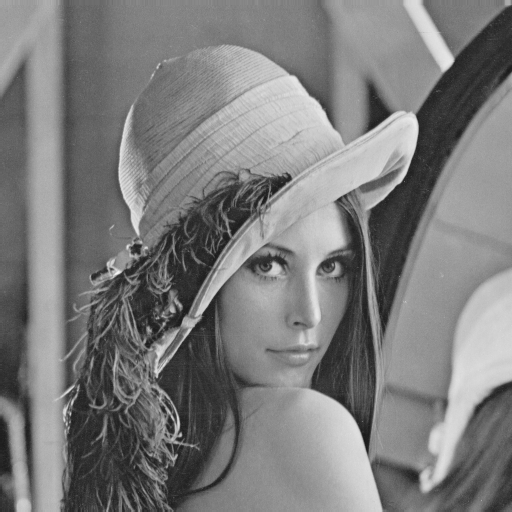

In [67]:
grayscale_image 

(-0.5, 511.5, 511.5, -0.5)

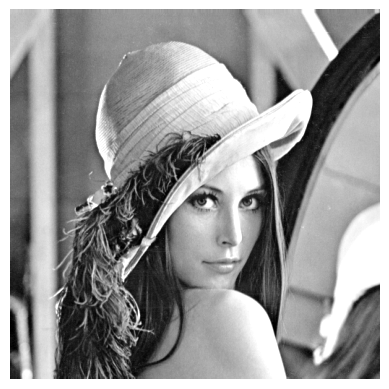

In [46]:
plt.imshow(grayscale_image, cmap=plt.cm.gray, vmin=30, vmax=200)
plt.axis('off')

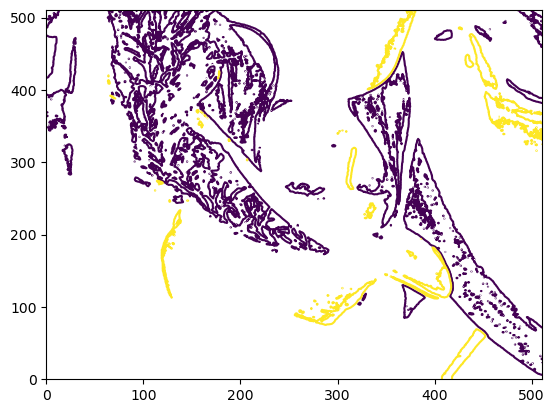

In [48]:
plt.contour(grayscale_image, [60, 211])

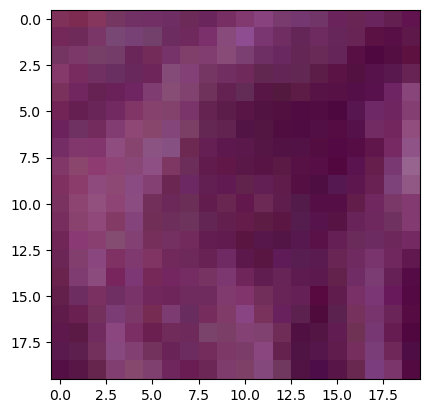

In [53]:
plt.imshow(lena[200:220, 200:220], cmap=plt.cm.gray)

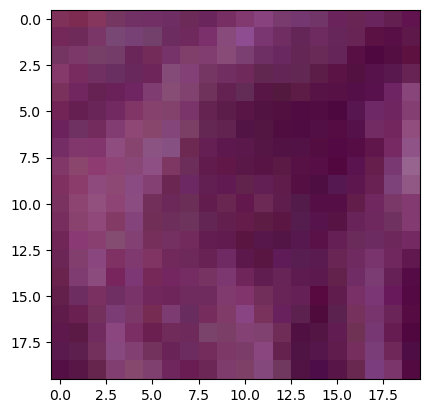

In [54]:
plt.imshow(lena[200:220, 200:220], cmap=plt.cm.gray, interpolation='nearest')

In [71]:
np.shape(grayscale_image)

(512, 512)

In [118]:
lx, ly = np.shape(grayscale_image)
lx, ly

(512, 512)

In [120]:
X, Y = np.ogrid[0:lx, 0:ly]

In [121]:
mask = (X - lx/2)**2 + (Y - ly/2)**2 > lx*ly/4

In [122]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

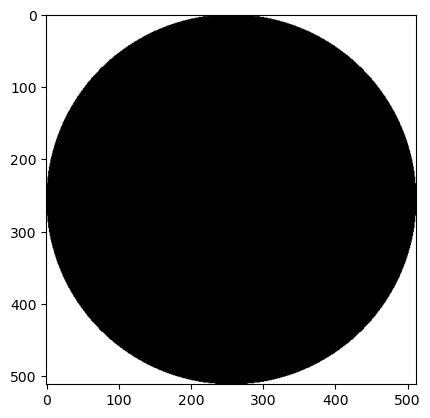

In [123]:
plt.imshow(mask, cmap=plt.get_cmap('gray'))
plt.show()

In [76]:
# Fancy indexing
grayscale_image[range(400), range(400)] = 255

In [84]:
img = mpimg.imread('lena.png')

In [85]:
print('Image dimensions:', img.shape)

Image dimensions: (512, 512, 3)


In [86]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(img)

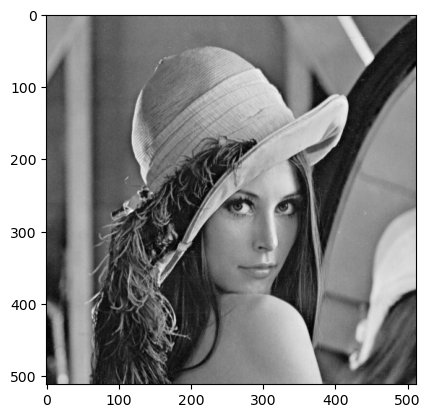

In [87]:
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

In [88]:
np.shape(gray)

(512, 512)

In [125]:
print("Original Array:", gray)

Original Array: [[0.63615845 0.63615845 0.63621845 ... 0.66482747 0.60747806 0.50256079]
 [0.63615845 0.63615845 0.63621845 ... 0.66482747 0.60747806 0.50256079]
 [0.63615845 0.63615845 0.63621845 ... 0.66482747 0.60747806 0.50256079]
 ...
 [0.16672001 0.16672001 0.19592079 ... 0.40837923 0.3921208  0.38551099]
 [0.17224236 0.17224236 0.21390746 ... 0.40627099 0.41181139 0.4234059 ]
 [0.17224236 0.17224236 0.21390746 ... 0.40627099 0.41181139 0.4234059 ]]


In [ ]:
grays = gray*255.9999

In [126]:
# Rounding and converting to integers
rounded_int_array = np.round(gray2).astype(int)
print("Rounded and Converted Array:", rounded_int_array)

Rounded and Converted Array: [[255.9999 255.9999 255.9999 ... 255.9999 255.9999 255.9999]
 [255.9999 255.9999 255.9999 ... 255.9999 255.9999 255.9999]
 [255.9999 255.9999 255.9999 ... 255.9999 255.9999 255.9999]
 ...
 [  0.       0.       0.     ...   0.       0.       0.    ]
 [  0.       0.       0.     ...   0.       0.       0.    ]
 [  0.       0.       0.     ...   0.       0.       0.    ]]


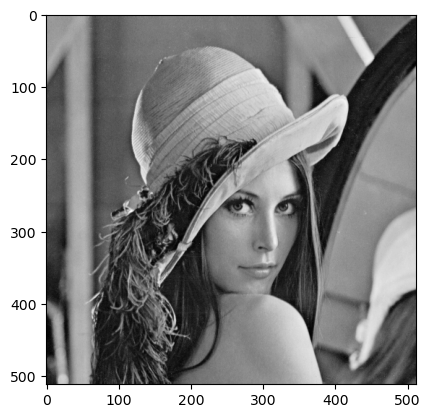

In [95]:
plt.imshow(rounded_int_array, cmap=plt.get_cmap('gray'))
plt.show()

In [96]:
rounded_int_array

array([[163, 163, 163, ..., 170, 156, 129],
       [163, 163, 163, ..., 170, 156, 129],
       [163, 163, 163, ..., 170, 156, 129],
       ...,
       [ 43,  43,  50, ..., 105, 100,  99],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]])

In [97]:
rounded_int_array[0, 40]

167

In [98]:
# Slicing
rounded_int_array[10:13, 20:23]
rounded_int_array[100:120] = 255

In [99]:
lx, ly = rounded_int_array.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx/2)**2 + (Y - ly/2)**2 > lx*ly/4

In [100]:
# Masks
rounded_int_array[mask] = 0
# Fancy indexing
rounded_int_array[range(400), range(400)] = 255

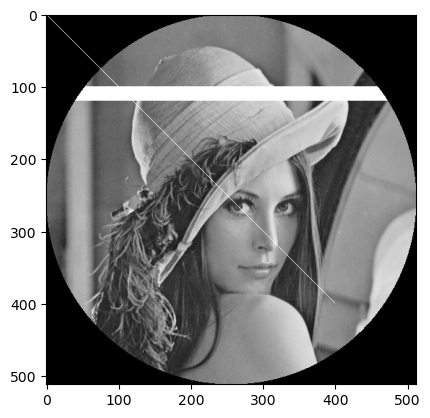

In [101]:
plt.imshow(rounded_int_array, cmap=plt.get_cmap('gray'))
plt.show()

In [103]:
rounded_int_array.mean()

103.04957962036133

In [104]:
rounded_int_array.max(), rounded_int_array.min()

(255, 0)

In [107]:
lx, ly = rounded_int_array.shape
lx, ly

(512, 512)

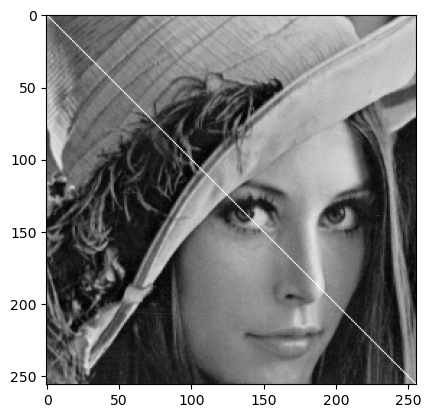

In [113]:
# Recorte de la imagen
crop_lena = rounded_int_array[128:-128, 128:-128]
plt.imshow(crop_lena, cmap=plt.get_cmap('gray'))
plt.show()

In [109]:
# up <-> down flip
flip_ud_lena = np.flipud(rounded_int_array)

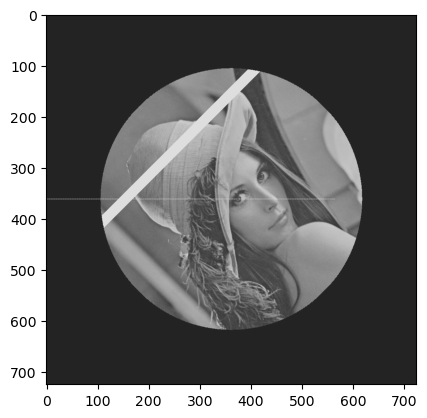

In [114]:
# rotación
from scipy import ndimage
rotate_lena = ndimage.rotate(rounded_int_array, 45)
plt.imshow(rotate_lena, cmap=plt.get_cmap('gray'))
plt.show()

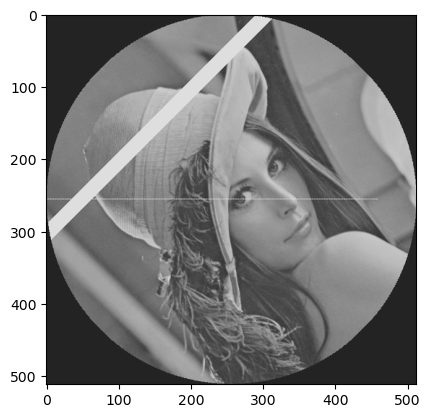

In [124]:
rotate_lena_noreshape = ndimage.rotate(rounded_int_array, 45, reshape=False)
plt.imshow(rotate_lena_noreshape, cmap=plt.get_cmap('gray'))
plt.show()